In [254]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [296]:
df = pd.read_csv('data/cleaned_video_game.csv')

In [297]:
df.head()

,Name,Console,Year_of_Release,ESRB_rating,Publisher,Global_players,Genre,Critic_Score,User_Score,NA_Sales,...,Accessory,LtdEdition,Multiplatform,RealTime,TurnBased,VisualNovel,FirstPerson,SideScrolling,TopDown,ThirdPerson
0,Tales of Xillia 2,PS3,2012,T,Namco Bandai Games,0.84,Role-Playing,71.0,7.9,0.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,.hack//Infection Part 1,PS2,2002,T,Atari,1.27,Role-Playing,75.0,8.5,0.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,.hack//Mutation Part 2,PS2,2002,T,Atari,0.68,Role-Playing,76.0,8.9,0.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,.hack//Outbreak Part 3,PS2,2002,T,Atari,0.46,Role-Playing,70.0,8.7,0.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,007 Racing,PS,2000,T,Electronic Arts,0.53,Racing,51.0,4.6,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [298]:
df.columns

Index(['Name', 'Console', 'Year_of_Release', 'ESRB_rating', 'Publisher',
       'Global_players', 'Genre', 'Critic_Score', 'User_Score', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Country_Sales', 'Sequel', 'Lifecycle',
       'MaxPlayers', 'Online', 'Licensed', 'Handheld', 'Accessory',
       'LtdEdition', 'Multiplatform', 'RealTime', 'TurnBased', 'VisualNovel',
       'FirstPerson', 'SideScrolling', 'TopDown', 'ThirdPerson'],
      dtype='object')

In [299]:
print(df.shape)
df.head()

(9376, 29)


,Name,Console,Year_of_Release,ESRB_rating,Publisher,Global_players,Genre,Critic_Score,User_Score,NA_Sales,...,Accessory,LtdEdition,Multiplatform,RealTime,TurnBased,VisualNovel,FirstPerson,SideScrolling,TopDown,ThirdPerson
0,Tales of Xillia 2,PS3,2012,T,Namco Bandai Games,0.84,Role-Playing,71.0,7.9,0.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,.hack//Infection Part 1,PS2,2002,T,Atari,1.27,Role-Playing,75.0,8.5,0.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,.hack//Mutation Part 2,PS2,2002,T,Atari,0.68,Role-Playing,76.0,8.9,0.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,.hack//Outbreak Part 3,PS2,2002,T,Atari,0.46,Role-Playing,70.0,8.7,0.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,007 Racing,PS,2000,T,Electronic Arts,0.53,Racing,51.0,4.6,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [300]:
#combine the JP_sales column and Other_Country_Sales columns
df.Other_Country_Sales = df.JP_Sales + df.Other_Country_Sales
df.drop(['JP_Sales'], axis=1, inplace=True)

### Handling Outliers

In [301]:
#get the columns which are not of type obj - need to do the box and whisker plot
col = df.dtypes.index
#non Object columns
non_Obj_cols = []
for i, c_type in enumerate(df.dtypes):
    if c_type != 'O':
        #print(col[i])
        non_Obj_cols.append(col[i])
#don't need to see the Year_of_Release box and Whisker plot
temp = df[non_Obj_cols].drop('Year_of_Release', axis=1)

,Year_of_Release,Global_players,Critic_Score,User_Score,NA_Sales,EU_Sales,Other_Country_Sales,Sequel,Lifecycle,MaxPlayers,...,Accessory,LtdEdition,Multiplatform,RealTime,TurnBased,VisualNovel,FirstPerson,SideScrolling,TopDown,ThirdPerson
count,9376.000000,9376.000000,9376.000000,9376.000000,9376.000000,9376.000000,9376.000000,9376.000000,9376.000000,9376.000000,...,9376.000000,9376.0,9376.000000,9376.000000,9376.000000,9376.0,9376.000000,9376.000000,9376.000000,9376.000000
mean,2007.534983,0.633145,68.280226,7.095862,0.328385,0.189382,0.115146,0.109215,0.480589,1.134919,...,0.001813,0.0,0.119881,0.013759,0.009172,0.0,0.049488,0.014612,0.023677,0.159983
std,4.120926,1.704665,13.485261,1.513125,0.840697,0.597986,0.402971,0.312609,1.115824,0.637020,...,0.042545,0.0,0.324839,0.116493,0.095337,0.0,0.216896,0.119999,0.152050,0.366610
min,1985.000000,0.010000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.090000,60.000000,6.300000,0.050000,0.010000,0.010000,0.000000,0.000000,1.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,0.230000,69.900000,7.400000,0.120000,0.040000,0.020000,0.000000,0.000000,1.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,2010.000000,0.590000,78.000000,8.200000,0.320000,0.160000,0.080000,0.000000,0.000000,1.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,2020.000000,82.530000,98.000000,9.700000,41.360000,28.960000,12.220000,2.000000,6.000000,8.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


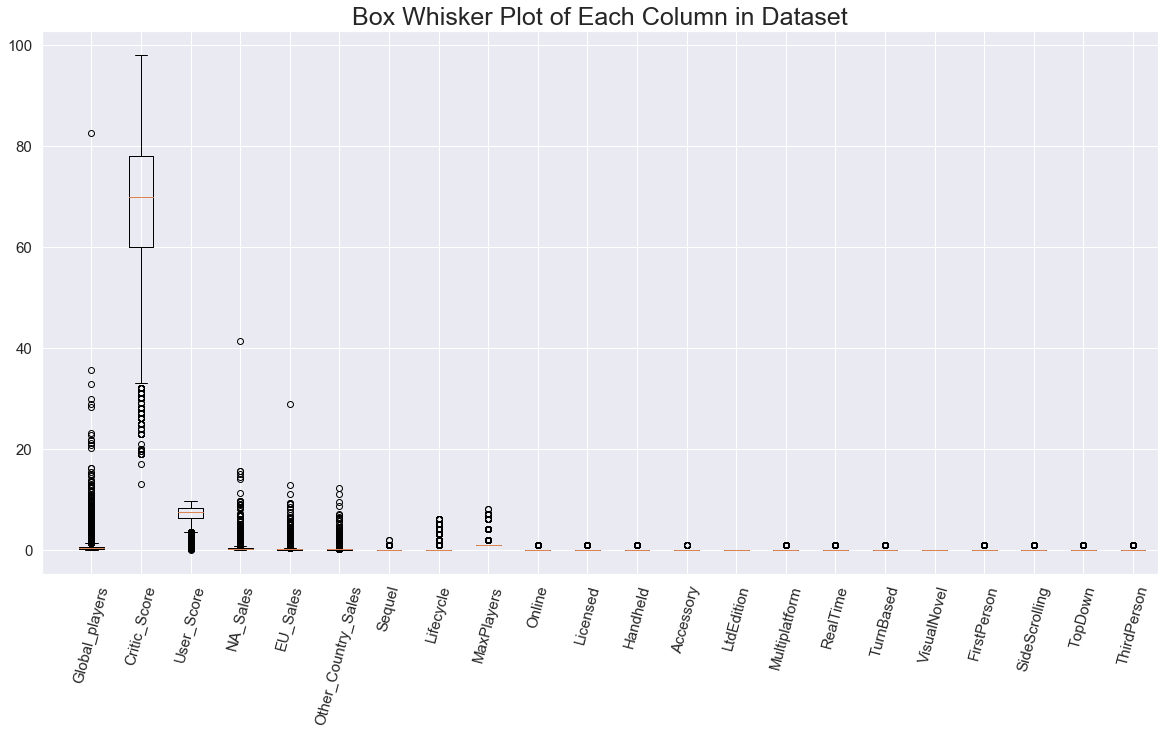

In [302]:
display(df.describe())

# Create a Box Whisker Plot of each column
plt.figure(figsize=(20, 10))
plt.boxplot([temp[col] for col in temp.columns])
plt.title("Box Whisker Plot of Each Column in Dataset", fontsize=25)
plt.xticks(range(len(temp.columns.values)+1), ['']+list(temp.columns.values), rotation=75, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Year_of_release is not in the box and whisker plot because it was not necessary

In [303]:
df.loc[df.Global_players > 40]

,Name,Console,Year_of_Release,ESRB_rating,Publisher,Global_players,Genre,Critic_Score,User_Score,NA_Sales,...,Accessory,LtdEdition,Multiplatform,RealTime,TurnBased,VisualNovel,FirstPerson,SideScrolling,TopDown,ThirdPerson
9044,Wii Sports,Wii,2006,E,Nintendo,82.53,Sports,76.0,8.0,41.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [304]:
df.loc[df.NA_Sales > 20]

,Name,Console,Year_of_Release,ESRB_rating,Publisher,Global_players,Genre,Critic_Score,User_Score,NA_Sales,...,Accessory,LtdEdition,Multiplatform,RealTime,TurnBased,VisualNovel,FirstPerson,SideScrolling,TopDown,ThirdPerson
9044,Wii Sports,Wii,2006,E,Nintendo,82.53,Sports,76.0,8.0,41.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [305]:
df.loc[df.EU_Sales > 20]

,Name,Console,Year_of_Release,ESRB_rating,Publisher,Global_players,Genre,Critic_Score,User_Score,NA_Sales,...,Accessory,LtdEdition,Multiplatform,RealTime,TurnBased,VisualNovel,FirstPerson,SideScrolling,TopDown,ThirdPerson
9044,Wii Sports,Wii,2006,E,Nintendo,82.53,Sports,76.0,8.0,41.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [306]:
#Wii Sports is an outlier - Remove it
df.drop(9044, axis=0, inplace=True)

### Create new column

In [307]:
df['NA_Sales_More_Eu'] = (df.NA_Sales > df.EU_Sales).astype('int')

In [308]:
#drop the EU sales
df.drop(['EU_Sales'], axis=1, inplace=True)

### EDA

In [309]:
df.head()

,Name,Console,Year_of_Release,ESRB_rating,Publisher,Global_players,Genre,Critic_Score,User_Score,NA_Sales,...,LtdEdition,Multiplatform,RealTime,TurnBased,VisualNovel,FirstPerson,SideScrolling,TopDown,ThirdPerson,NA_Sales_More_Eu
0,Tales of Xillia 2,PS3,2012,T,Namco Bandai Games,0.84,Role-Playing,71.0,7.9,0.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,.hack//Infection Part 1,PS2,2002,T,Atari,1.27,Role-Playing,75.0,8.5,0.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,.hack//Mutation Part 2,PS2,2002,T,Atari,0.68,Role-Playing,76.0,8.9,0.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,.hack//Outbreak Part 3,PS2,2002,T,Atari,0.46,Role-Playing,70.0,8.7,0.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,007 Racing,PS,2000,T,Electronic Arts,0.53,Racing,51.0,4.6,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


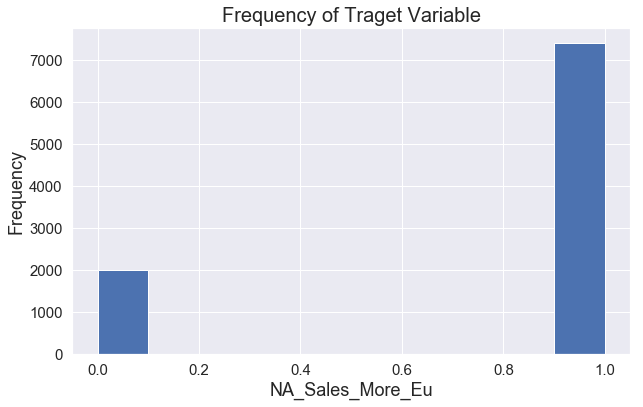

In [312]:
# plt.style.use('darkgrid')
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
df.NA_Sales_More_Eu.hist()
plt.title('Frequency of Traget Variable')
plt.ylabel('Frequency')
plt.xlabel('NA_Sales_More_Eu')
plt.show()

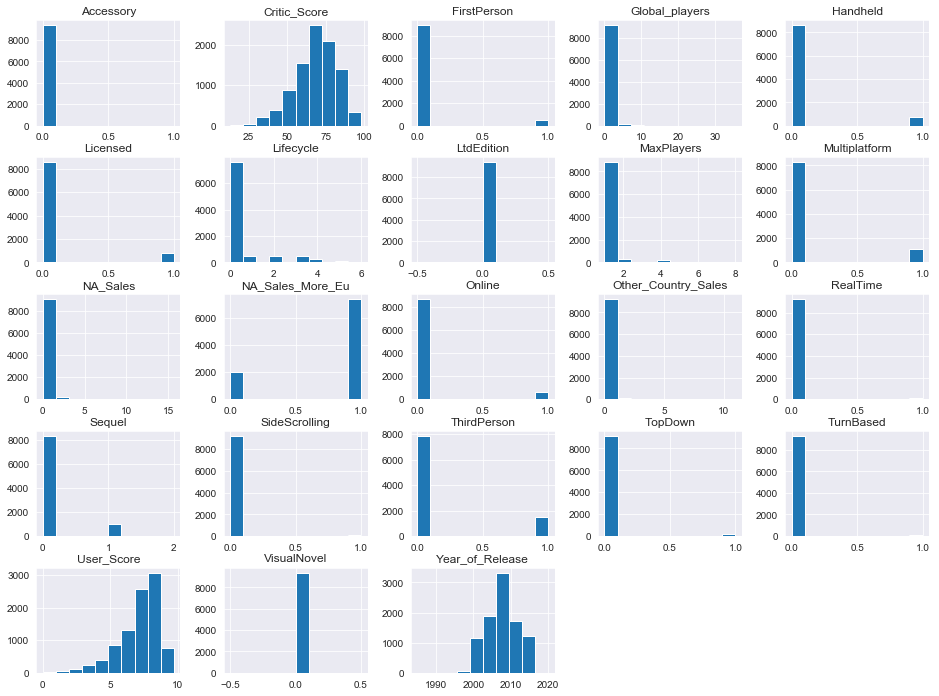

In [16]:
df.hist(figsize=(16,12))
plt.show()

In [17]:
# def freq_bar(ax, col):
#     ax = df[col].value_counts().plot(kind='bar',
#                                     title='{} Frequency'.format(str(col)), ax=ax,
#                                     cmap=plt.get_cmap('viridis'))
#     ax.set_xlabel(str(col))
#     ax.set_ylabel("Frequency")

In [18]:
def freq_bar(df, col, ax):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=ax, palette='Blues_d')
    

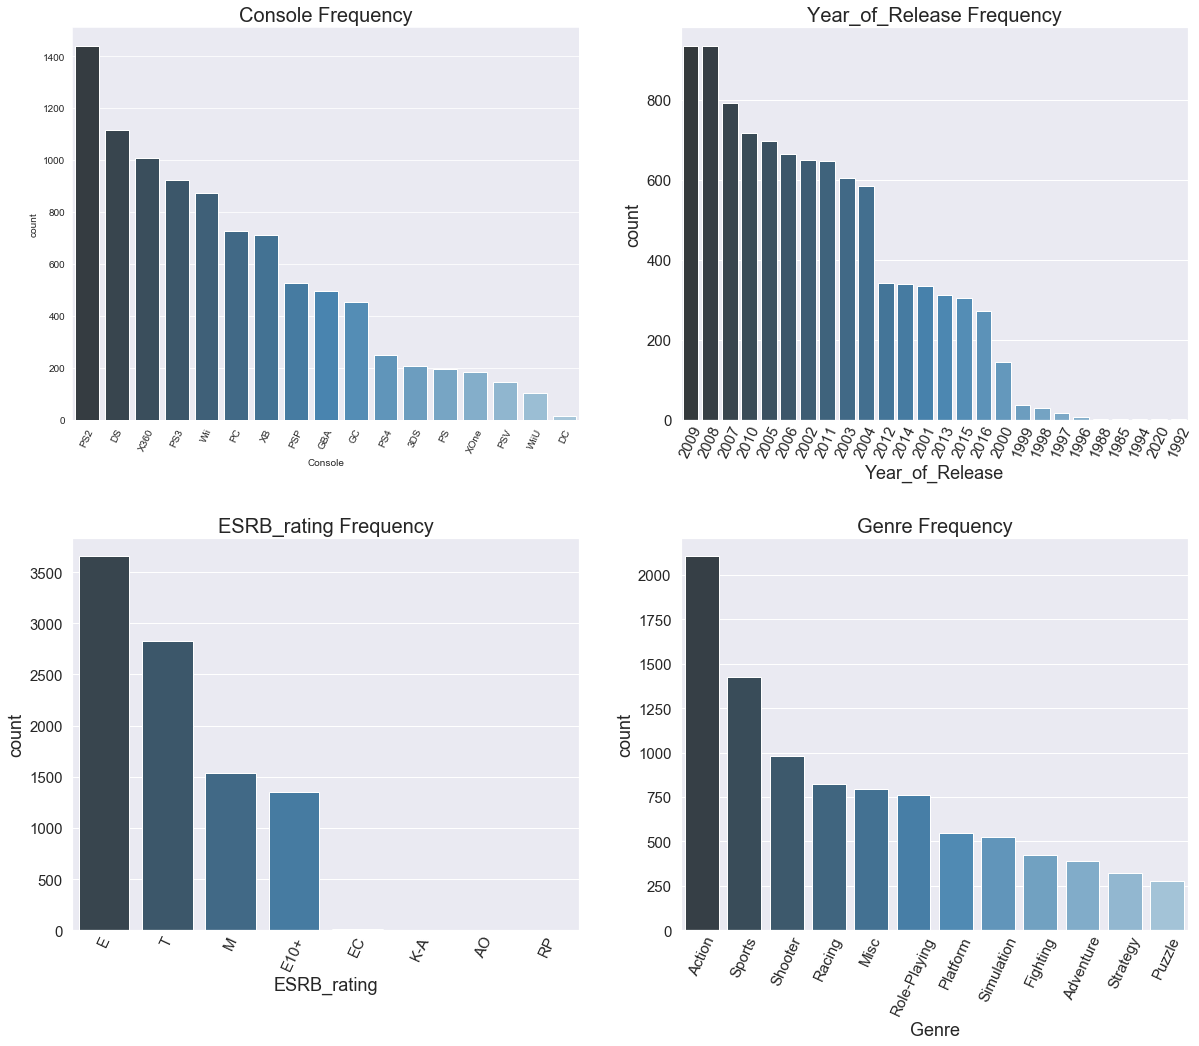

In [19]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,26))
fig.subplots_adjust(hspace = .30)
plot_cols = ['Console', 'Year_of_Release','ESRB_rating', 'Genre']

pos = 321
rc={'axes.labelsize': 18, 'font.size': 32, 'legend.fontsize': 32.0, 'axes.titlesize': 20,
    'xtick.labelsize': 15, 'ytick.labelsize': 15, "xtick.direction": "in"}
for col in plot_cols:
    ax1 = fig.add_subplot(pos)
    sns.set(rc=rc)
    plt.xticks(rotation=65)
    plt.title('{} Frequency'.format(str(col)))
    freq_bar(df, col, ax1)
    pos +=1

# ax2=fig.add_subplot(322)
# freq_bar(ax2, 'Year_of_Release')



- most of the data is consisted of games released between 2002 to 2016
- During that time period, many games have been released for the PS2
> The PS2 was released in 2000 which means it had more of a time than the PS3 (2006) and especially the PS4(2013) for games to be released on the platform <br>
- Most games during this time period were rated for everyone(E), teens(T), mature(M), and everyone 10+(E10+)
- Most games during this time period were Action games

In [20]:
def bar(x_col, y_col, color=None, palette=None, hue=None, num=len(temp)):
    rc={'axes.labelsize': 18, 'font.size': 32, 'legend.fontsize': 15.0, 'axes.titlesize': 20,
    'xtick.labelsize': 15, 'ytick.labelsize': 15, "xtick.direction": "in"}
    sns.set(rc=rc)
    x = sns.barplot(x=x_col, y=y_col, color=color, data=temp[:num], palette=palette, hue=hue);
    return x

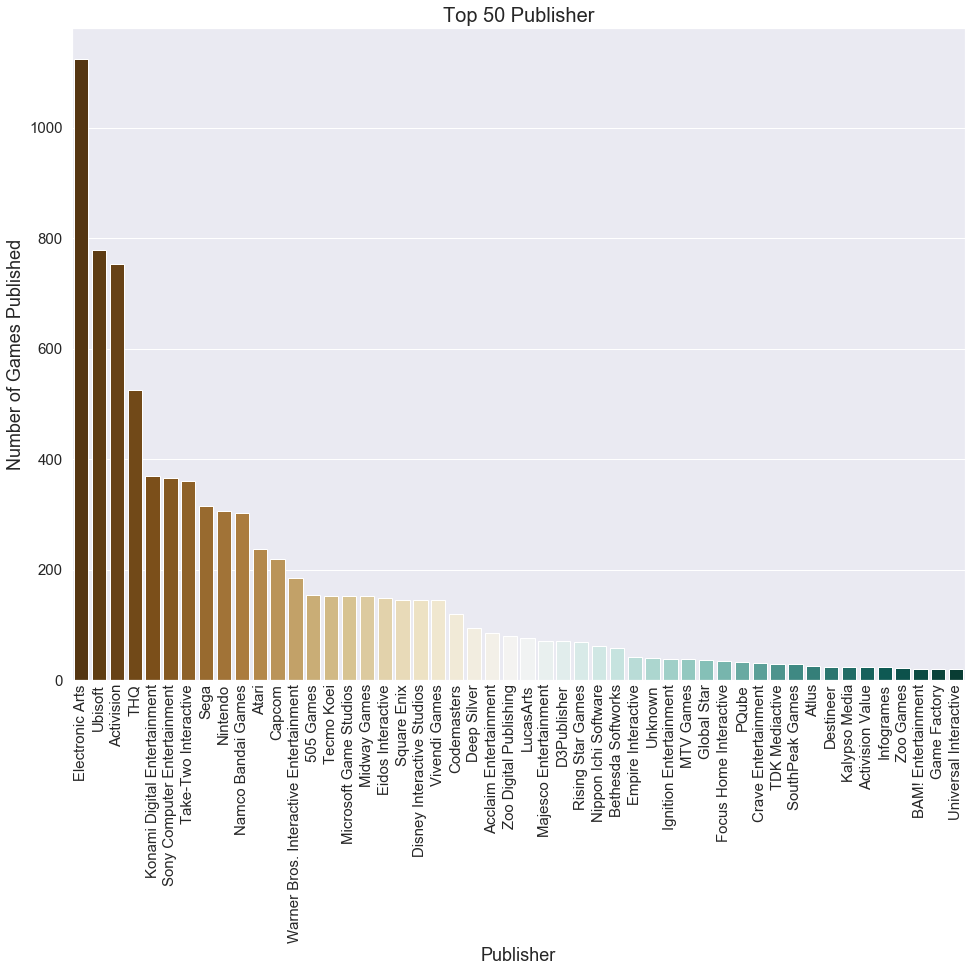

In [21]:
#want count of publisher games released - reset index b/c publisher became index - sort by most games released
temp = df.groupby(['Publisher'])['Name'].count().reset_index().sort_values(by='Name', ascending=False)

plt.figure(figsize = (16,12))
x = bar('Publisher', 'Name', palette='BrBG', num=50)
x.axes.set_title('Top 50 Publisher')
x.axes.set_ylabel('Number of Games Published')
plt.xticks(rotation=90)
plt.show()

- During the time period of 2002 to 2016, EA, Ubisoft, and Activision were the top publishing game companies.
- THQ came in 4th, being a major game publishing company, however, they defuncted(no longer existing) in 2013

In [22]:
df.columns

Index(['Name', 'Console', 'Year_of_Release', 'ESRB_rating', 'Publisher',
       'Global_players', 'Genre', 'Critic_Score', 'User_Score', 'NA_Sales',
       'Other_Country_Sales', 'Sequel', 'Lifecycle', 'MaxPlayers', 'Online',
       'Licensed', 'Handheld', 'Accessory', 'LtdEdition', 'Multiplatform',
       'RealTime', 'TurnBased', 'VisualNovel', 'FirstPerson', 'SideScrolling',
       'TopDown', 'ThirdPerson', 'NA_Sales_More_Eu'],
      dtype='object')

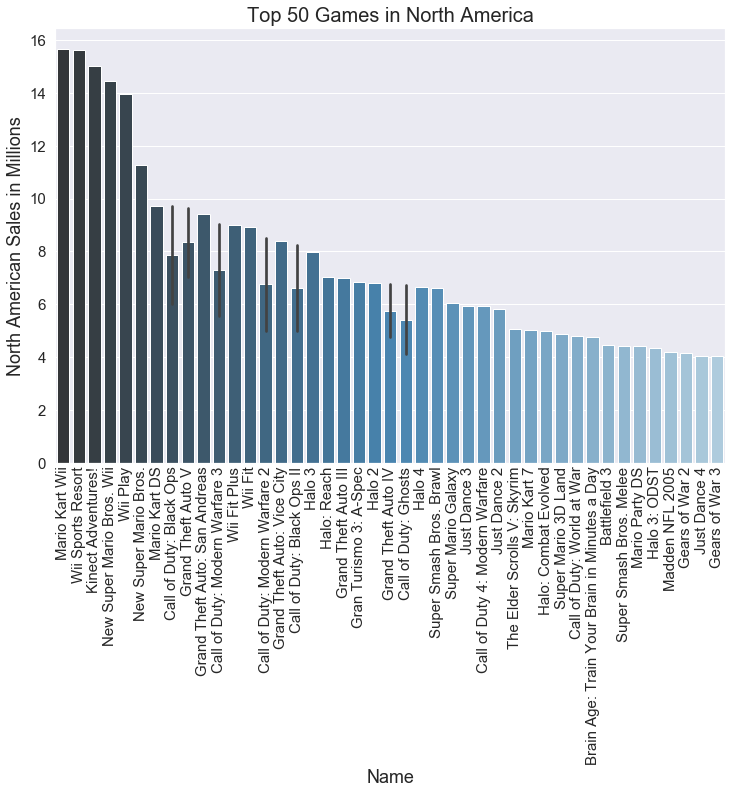

In [23]:
#want North American Sales by games
temp = df.sort_values(by='NA_Sales', ascending=False)

plt.figure(figsize = (12,8))
x = bar('Name', 'NA_Sales', palette='Blues_d',num=50,hue=None)
x.axes.set_title('Top 50 Games in North America')
x.axes.set_ylabel('North American Sales in Millions')
plt.xticks(rotation=90)
# plt.legend(loc=1)
plt.show()

- There is variance for some games such as Call of Duty: Black Ops because it was released on mulitple platforms

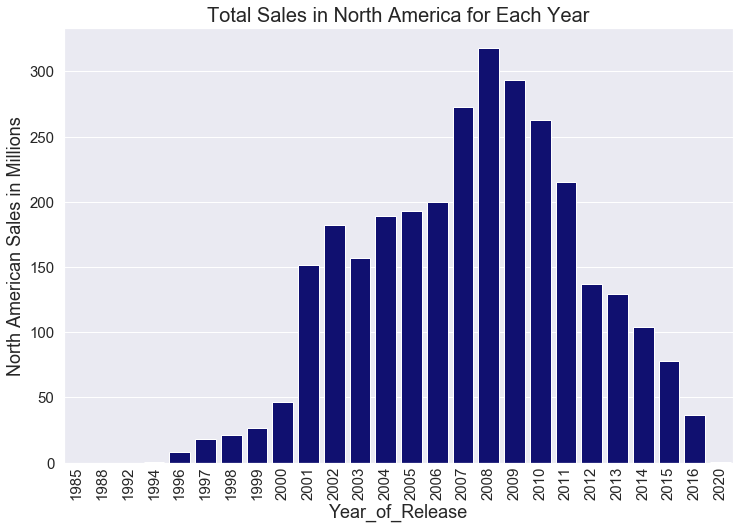

In [24]:
#isolate year_of_release and NA_Sales
temp = df.groupby(['Year_of_Release'])['NA_Sales'].sum().reset_index().sort_values(by='Year_of_Release', ascending=False)

plt.figure(figsize = (12,8))
x = bar('Year_of_Release', 'NA_Sales', color='navy', palette=None, num=None, hue=None)
x.axes.set_title('Total Sales in North America for Each Year')
x.axes.set_ylabel('North American Sales in Millions')
plt.xticks(rotation=90)
# plt.legend(loc=1)
plt.show()

- This matches with our previous graph about frequency of games each year. The more games that were released that year, the more money North Americans spent of the games

In [25]:
#get percentage stats of bar chart below
def get_stats(col):
    stats = df.groupby([col, 'NA_Sales_More_Eu'])[col].count().unstack()
    EU_total = stats.fillna(0).sum()[0]
    NA_total = stats.fillna(0).sum()[1]
    print(pd.concat([(stats[0]/EU_total),(stats[1]/NA_total)], axis=1).rename({0:'EU', 1:'NA'}, axis=1))
    
#create frequency bar chart differentiating between EU and NA
def default_vs(col):
    parch = df.groupby([col, 'NA_Sales_More_Eu'])[col].count().unstack()
    p3 = parch.plot(kind = 'bar', stacked = True,
                      color = ['steelblue', 'y']);
    p3.set_title('Most Frequent {} for NA and EU'.format(col), fontsize=16)
    p3.set_xlabel(col, fontsize=15)
    p3.set_ylabel('Number of Games', fontsize=15)
    p3.legend(['EU','NA'])
    
    plt.show()

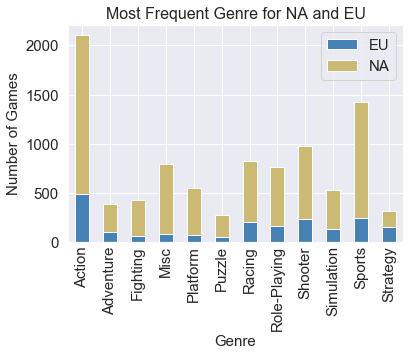

                    EU        NA
Genre                           
Action        0.245473  0.218763
Adventure     0.051308  0.038581
Fighting      0.030181  0.049411
Misc          0.041247  0.096656
Platform      0.037726  0.064167
Puzzle        0.026157  0.030459
Racing        0.101107  0.084337
Role-Playing  0.080483  0.081224
Shooter       0.119718  0.100447
Simulation    0.064889  0.053878
Sports        0.124748  0.159334
Strategy      0.076962  0.022743


In [26]:
col = 'Genre'
default_vs(col)
get_stats(col)

- for both NA and EU, Action games were the primary games bought
- The least liked game genre for NA was puzzles, similarly for EU
- EU and NA mainly spend the same percentages on game genres, not much dipasrity except for Strategy where EU had 7% and NA had 2%

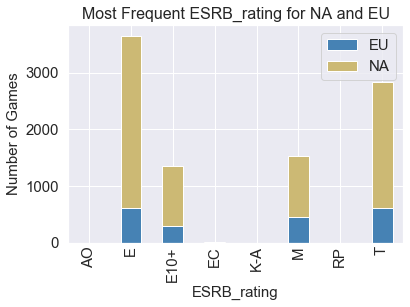

                   EU        NA
ESRB_rating                    
AO                NaN  0.000135
E            0.309356  0.411534
E10+         0.148390  0.142412
EC                NaN  0.001083
K-A               NaN  0.000271
M            0.229879  0.145661
RP           0.000503       NaN
T            0.311871  0.298903


In [27]:
col = 'ESRB_rating'
default_vs(col)
get_stats(col)

- NA buys more rated everyone(E) games than Eu at 41% compared to 30%
- EU and NA buy the same percentage of games for E10+ at 14%
- EU buys more rated mature(M) games than NA at 22% compared to 14%
- EU buys more rated teen(T) games than NA at 31% compared to 29%

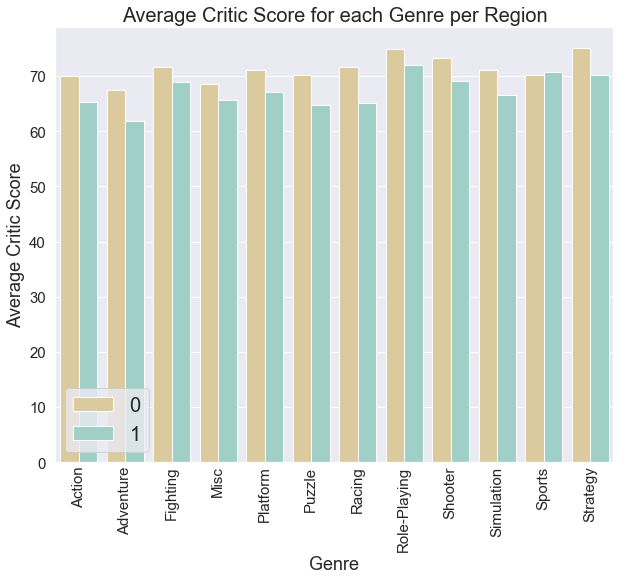

In [28]:
temp = df.groupby(['Genre', 'NA_Sales_More_Eu'])['Critic_Score'].mean().reset_index()

plt.figure(figsize = (10,8))
x = bar('Genre', 'Critic_Score', palette='BrBG', hue='NA_Sales_More_Eu',num=50)
x.axes.set_title('Average Critic Score for each Genre per Region')
x.axes.set_ylabel('Average Critic Score')
plt.xticks(rotation=90)
plt.legend(loc=3, prop={'size': 20})
plt.show()

- For the Games where more copies were sold in NA, the critic score was lower in all genres compared to the critic score of games where more copies were sold in EU

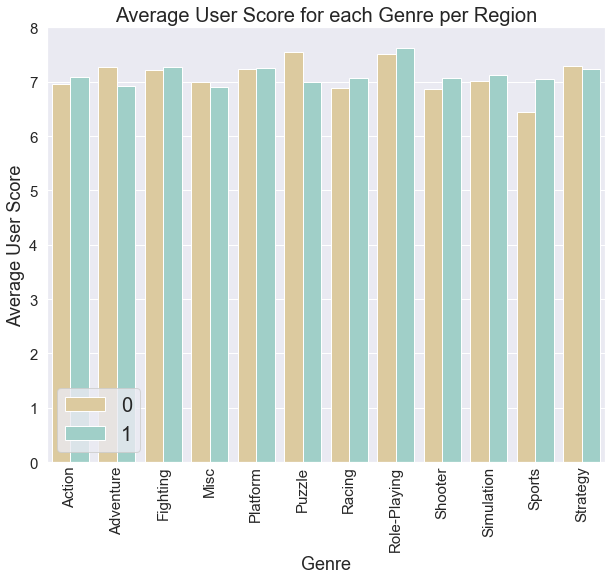

In [29]:
temp = df.groupby(['Genre', 'NA_Sales_More_Eu'])['User_Score'].mean().reset_index()

plt.figure(figsize = (10,8))
x = bar('Genre', 'User_Score', palette='BrBG', hue='NA_Sales_More_Eu',num=50)
x.axes.set_title('Average User Score for each Genre per Region')
x.axes.set_ylabel('Average User Score')
plt.xticks(rotation=90)
plt.legend(loc=3, prop={'size': 20})
plt.show()

In [30]:
df.groupby(['NA_Sales_More_Eu', 'Online'])['NA_Sales'].mean()

NA_Sales_More_Eu  Online
0                 0.0       0.165630
                  1.0       0.180065
1                 0.0       0.349332
                  1.0       0.597960
Name: NA_Sales, dtype: float64

- for the games that were more profitable in NA, whether it was online had a big impact on the average NA_Sales

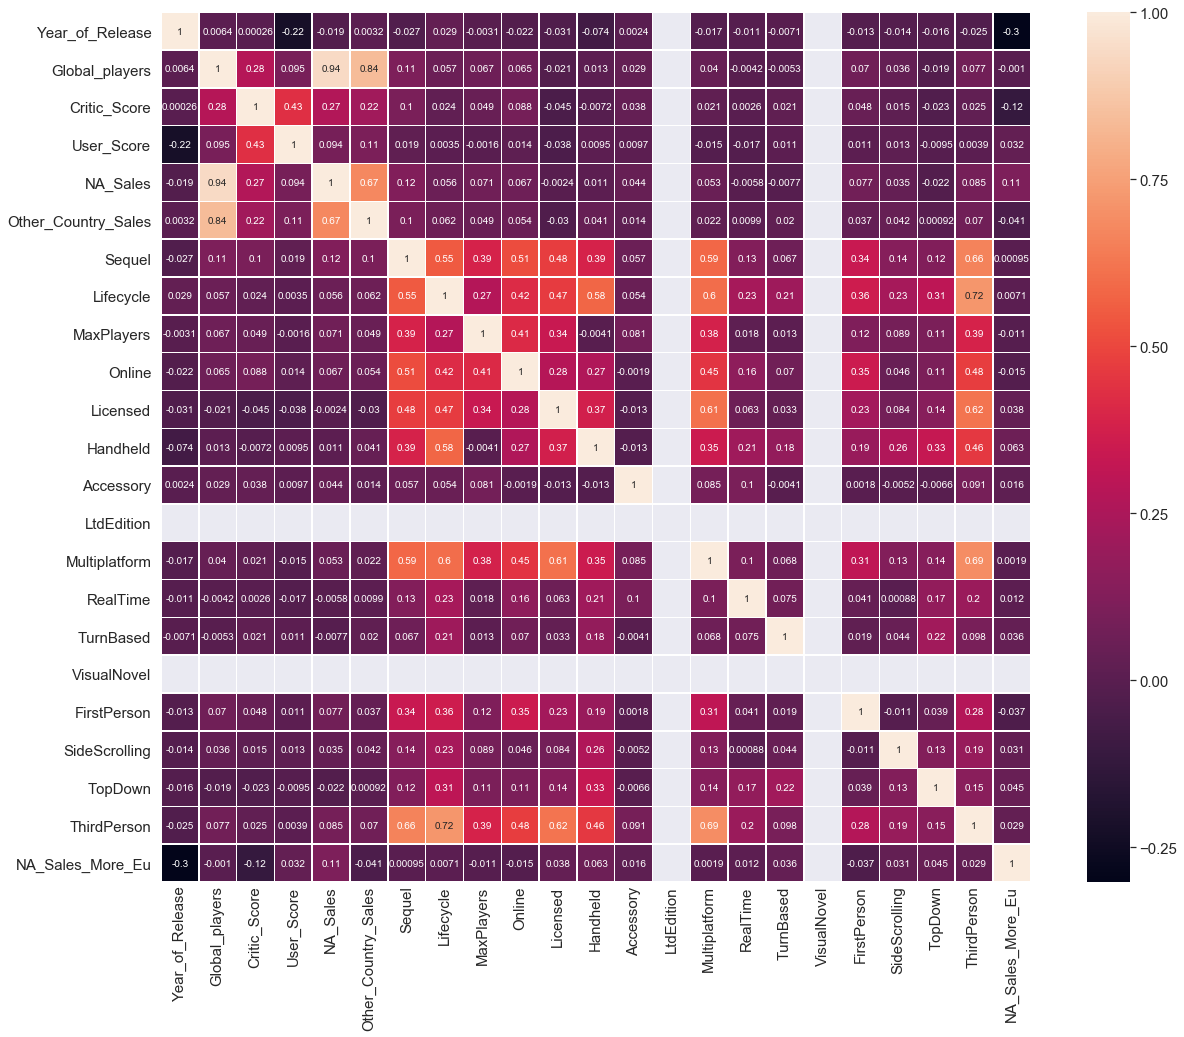

In [31]:
#correlation matrix
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True, square=True, linewidths=.5, annot_kws={"size": 10})
plt.show()

- all the predictors are poorly correlated with the target variable NA_Sales_More_Eu
- Global_Players is very highly correlated with NA_Sales and Other_Country_Sales
> - I could possibly drop Global_Players to avoid the multicollinearity, however, I would lose a possible valuable data
> - The other option is to keep it and create interaction terms between the multicolinear variables

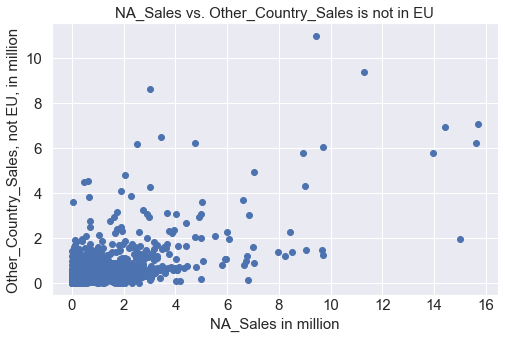

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(df.NA_Sales, df.Other_Country_Sales)
plt.title('NA_Sales vs. Other_Country_Sales is not in EU', fontsize=15)
plt.xlabel('NA_Sales in million', fontsize=15)
plt.ylabel('Other_Country_Sales, not EU, in million',fontsize=15)
plt.show()

In [36]:
def get_interact(col):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x=col, y='NA_Sales_More_Eu')
    plt.title('{} vs. NA_Sales_More_Eu'.format(str(col)), fontsize=15)
    plt.xlabel(str(col), fontsize=15)
    plt.ylabel('NA_Sales_More_Eu',fontsize=15)
    plt.show()

In [37]:
df.select_dtypes(include=['object']).columns

Index(['Name', 'Console', 'ESRB_rating', 'Publisher', 'Genre'], dtype='object')

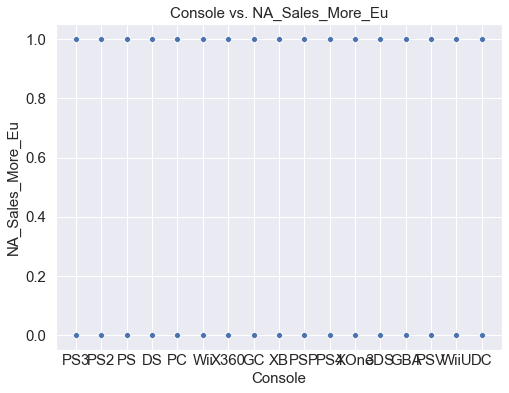

In [39]:
get_interact('Console')

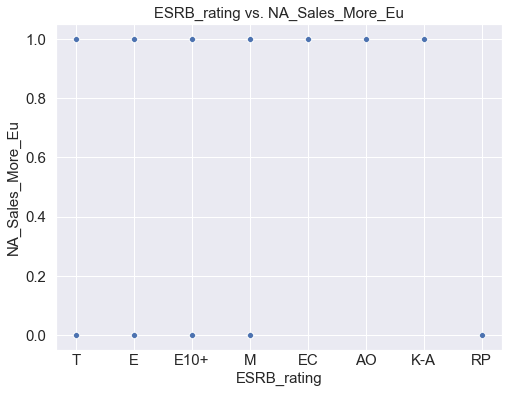

In [40]:
get_interact('ESRB_rating')

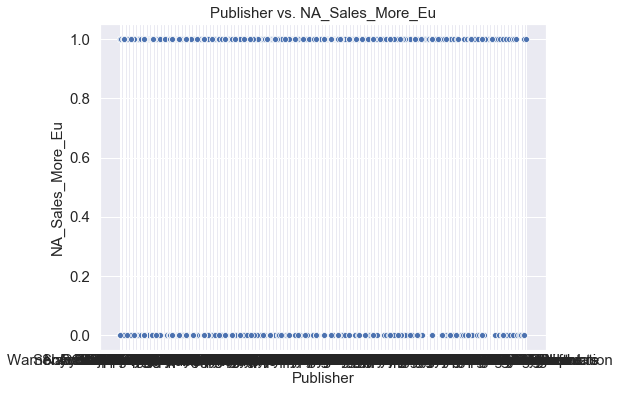

In [41]:
get_interact('Publisher')

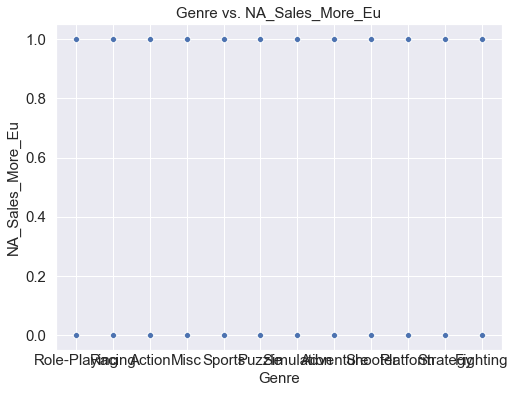

In [42]:
get_interact('Genre')

Create interaction terms:
- NA_Sales and LtdEdition (LtdEdition items typically cost more)
- Online and MaxPlayers
- NA_Sales and Sequel
- Critic_Score and User_Score
- NA_Sales and Other_Country_Sales
- Global_Players and Online
- Global_Players and MaxPlayers
- Global_Players and NA_Sales
- Global_Players and Other_Country_Sales

Polynomials:
- Sequal^2
- MaxPlayers^2
- NA_Sales^2
- Critic_Score^2
- User_Score^2


## Feature Engineering

There was no way to see if the game publisher or game name would be a factor in differentiating between NA or EU. The most that could be done was a simple count bar graph. Therefore we take it off as it doesn't seem to be a viable predictor.

The Sales of other countries, including NA_Sales does not seem like a realistic predictor either as normally, if you wanted to know whether a game was going to perform better in NA or EU, you would do the prediction before the game is realeased and as such do not know the total sales. It would not be fair if we knew NA_Sales but didn't know EU_Sales

In [268]:
df.drop(['Other_Country_Sales', 'Publisher', "Name", 'NA_Sales'], axis=1, inplace=True)

In [269]:
#seperate target variable from rest of data
target = df.NA_Sales_More_Eu
features = df.iloc[:,:-1]

In [270]:
#seperate the object features from eveyrthing else - to make polynomials
no_obj_features= features.select_dtypes(include=['float64', 'int64'])
only_obj_features= features.select_dtypes(include=['object'])

In [271]:
#create polynomial features and interaction terms for the numerical data
poly = PolynomialFeatures(degree=2)
poly.fit(no_obj_features)
column_names = poly.get_feature_names(no_obj_features.columns)
feature_poly= pd.DataFrame(poly.transform(no_obj_features), columns=column_names)
#get rid of the '1' column because it doesn't make sense
feature_poly.drop(['1'],axis=1,inplace=True)

In [272]:
#dataset with poly and categoral features
comb_feature_poly = only_obj_features.join(feature_poly)

In [273]:
#get rid of nulls
comb_feature_poly = comb_feature_poly.join(target).dropna()

In [274]:
#seperate target and feature columns
target = comb_feature_poly['NA_Sales_More_Eu']
comb_feature_poly = comb_feature_poly.drop(['NA_Sales_More_Eu'], axis=1)

In [275]:
#create dummy columns
feature_poly_dummy = pd.get_dummies(data=comb_feature_poly, columns=['Console','ESRB_rating', 'Genre'])

In [276]:
#dummy variables for original data
df_dummies = pd.get_dummies(data=df, columns=['Console','ESRB_rating', 'Genre'])

In [277]:
#original
print(df.shape)
#orginal with dummies
print(df_dummies.shape)
#polynomial features and interactions
print(comb_feature_poly.shape)
#dummy of cat in polynomial features and interactions
print(feature_poly_dummy.shape)
#target variable
print(target.shape)
df.drop([9375],inplace=True)
df_dummies.drop([9375],inplace=True)


(9375, 24)
(9375, 58)
(9374, 233)
(9374, 267)
(9374,)


In [278]:
df.head()

,Console,Year_of_Release,ESRB_rating,Global_players,Genre,Critic_Score,User_Score,Sequel,Lifecycle,MaxPlayers,...,LtdEdition,Multiplatform,RealTime,TurnBased,VisualNovel,FirstPerson,SideScrolling,TopDown,ThirdPerson,NA_Sales_More_Eu
0,PS3,2012,T,0.84,Role-Playing,71.0,7.9,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,PS2,2002,T,1.27,Role-Playing,75.0,8.5,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,PS2,2002,T,0.68,Role-Playing,76.0,8.9,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,PS2,2002,T,0.46,Role-Playing,70.0,8.7,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,PS,2000,T,0.53,Racing,51.0,4.6,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [279]:
df.dtypes

Console              object
Year_of_Release       int64
ESRB_rating          object
Global_players      float64
Genre                object
Critic_Score        float64
User_Score          float64
Sequel              float64
Lifecycle           float64
MaxPlayers          float64
Online              float64
Licensed            float64
Handheld            float64
Accessory           float64
LtdEdition          float64
Multiplatform       float64
RealTime            float64
TurnBased           float64
VisualNovel         float64
FirstPerson         float64
SideScrolling       float64
TopDown             float64
ThirdPerson         float64
NA_Sales_More_Eu      int64
dtype: object

In [280]:
#change object types to category
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].astype('category')
    
#change object types to category
for col in comb_feature_poly.select_dtypes(include=['object']):
    df[col] = df[col].astype('category')

In [281]:
#take off target variable
df.drop(['NA_Sales_More_Eu'], axis=1, inplace=True)
df_dummies.drop(['NA_Sales_More_Eu'], axis=1, inplace=True)

# Feature Selection

Run a baseline model without choosing the features to see if it improves

In [282]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

### baseline

run logistic Regression to sample

In [287]:
#Original with Dummy

#sepearte into train and test set
X_train, X_test, y_train, y_test = train_test_split(df_dummies, target, random_state=1)
#create model
logreg = LogisticRegression()
#fit model
logreg.fit(X_train, y_train)


logreg.fit(X_train, y_train)
print('train')
y_pred_class = logreg.predict(X_train)
print_metrics(y_train, y_pred_class)
print('\ntest')
y_pred_class = logreg.predict(X_test)
print_metrics(y_test, y_pred_class)

train
Precision Score: 0.8607085346215781
Recall Score: 0.9660220495210555
Accuracy Score: 0.8502133712660028
F1 Score: 0.9103295580345738

test
Precision Score: 0.8700920988851187
Recall Score: 0.9681769147788565
Accuracy Score: 0.860494880546075
F1 Score: 0.9165177431707939


In [284]:
#Polynomial, Dummy df

#sepearte into train and test set
X_train, X_test, y_train, y_test = train_test_split(feature_poly_dummy, target, random_state=1)
#create model
logreg = LogisticRegression()
#fit model
logreg.fit(X_train, y_train)
print('train')
y_pred_class = logreg.predict(X_train)
print_metrics(y_train, y_pred_class)
print('\ntest')
y_pred_class = logreg.predict(X_test)
print_metrics(y_test, y_pred_class)



train
Precision Score: 0.7874127865584508
Recall Score: 0.99945779866257
Accuracy Score: 0.7871977240398293
F1 Score: 0.8808537750876075

test
Precision Score: 0.7908664105847204
Recall Score: 0.9994606256742179
Accuracy Score: 0.7905290102389079
F1 Score: 0.8830116750059566


The F1 scores are already pretty high. Both models have a high recal score as well

Train two different datasets: one as the original with dummy variables and the other with interaction, polynomial, and dummy variables

find the best columns for each set. The cut off for how many columns are allowed is half of the numbers of columns present. Test Again to see if theres any improvement on the F1 score

### Selecting Important Features

In [285]:
#Use F test for feature Selection
X_train, X_test, y_train_df, y_test_df = train_test_split(df_dummies, target, test_size=0.2)
selector = SelectKBest(f_regression, k=25)

selector.fit(X_train, y_train_df)
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
X_train_df = X_train[selected_columns]
X_test_df = X_test[selected_columns]
X_train_df.shape

#create model
logreg = LogisticRegression()
#fit model
logreg.fit(X_train_df, y_train_df)
#calculate train
print('train')
y_pred_class = logreg.predict(X_train_df)
print_metrics(y_train_df, y_pred_class)
#calculate test
print('\ntest')
y_pred_class = logreg.predict(X_test_df)
print_metrics(y_test_df, y_pred_class)

train
Precision Score: 0.8661608497723824
Recall Score: 0.965004226542688
Accuracy Score: 0.8547806374183224
F1 Score: 0.9129148340663734

test
Precision Score: 0.8594692400482509
Recall Score: 0.9680706521739131
Accuracy Score: 0.8506666666666667
F1 Score: 0.9105431309904153


In [290]:
#choose the best columns for original dataframe
#Use F test for feature Selection
X_train, X_test, y_train_poly, y_test_poly = train_test_split(feature_poly_dummy, target, test_size=0.2)
selector = SelectKBest(f_regression, k=100)

selector.fit(X_train, y_train_poly)
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
X_train_poly = X_train[selected_columns]
X_test_poly = X_test[selected_columns]
X_train_poly.shape

# create model
logreg = LogisticRegression()
logreg.fit(X_train_poly, y_train_poly)
#calculate train
print('train')
y_pred_class = logreg.predict(X_train_poly)
print_metrics(y_train_poly, y_pred_class)
#calculate test
print('\ntest')
y_pred_class = logreg.predict(X_test_poly)
print_metrics(y_test_poly, y_pred_class)

train
Precision Score: 0.7872198505869797
Recall Score: 0.9996611892258174
Accuracy Score: 0.7870382717695693
F1 Score: 0.8808120008955892

test
Precision Score: 0.7914666666666667
Recall Score: 1.0
Accuracy Score: 0.7914666666666667
F1 Score: 0.8835963084251266


- The modified datasets provide a higher recal score as well. It is very suspicous of the feature_poly_dummy recall score.
- I will choose the df_dummies dataset
- Will work with just that dataset set now.

In [292]:
df_dummies.head()

,Year_of_Release,Global_players,Critic_Score,User_Score,Sequel,Lifecycle,MaxPlayers,Online,Licensed,Handheld,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,2012,0.84,71.0,7.9,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,2002,1.27,75.0,8.5,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,2002,0.68,76.0,8.9,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,2002,0.46,70.0,8.7,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,2000,0.53,51.0,4.6,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [293]:
#put final dataset into a csv and do hyperparameter tuning in different notebook
final = df_dummies.join(target)

In [294]:
#final.to_csv('modeling_video_game_dataset.csv', index=False)